In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataset = pd.read_csv('petrol_consumption.csv')

In [4]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [5]:
dataset.shape

(48, 5)

In [6]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


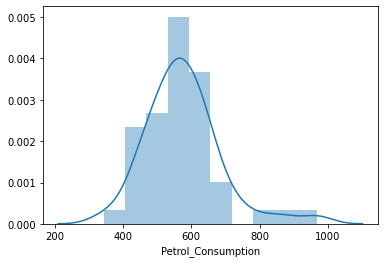

In [8]:
sns.distplot(dataset['Petrol_Consumption'])

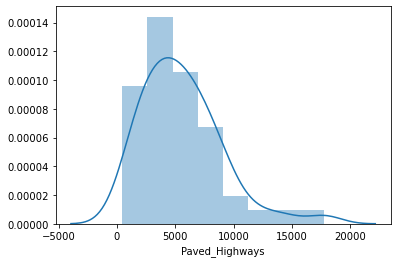

In [10]:
sns.distplot(dataset['Paved_Highways'])

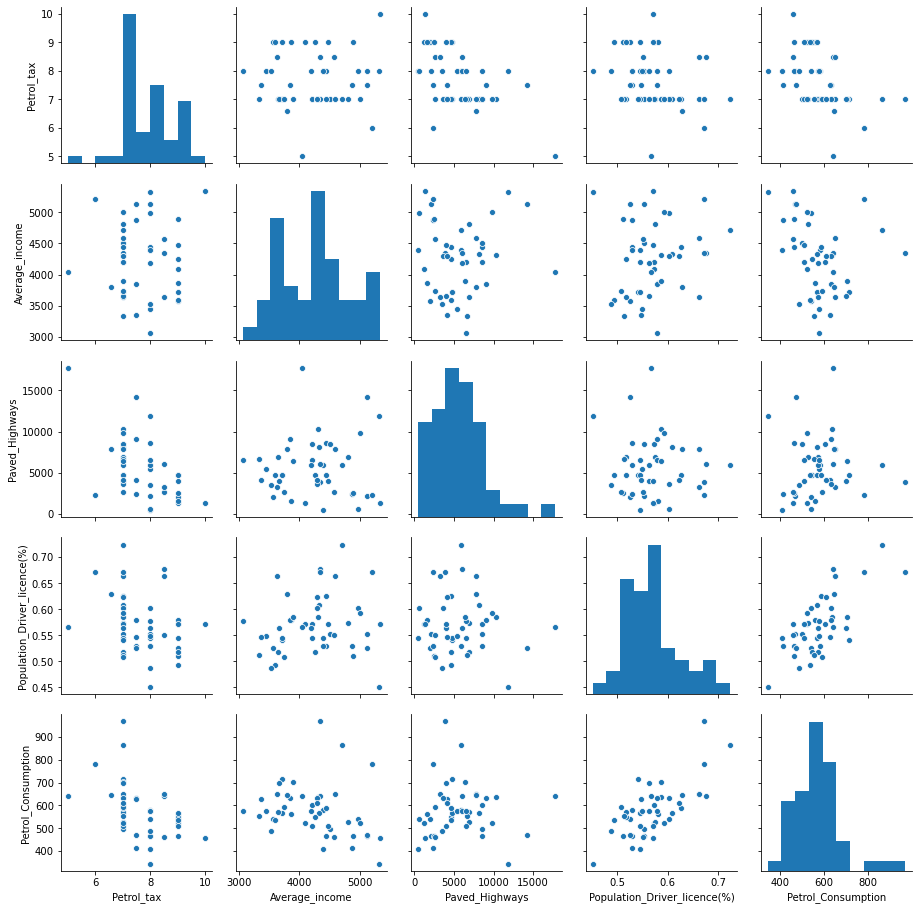

In [11]:
sns.pairplot(dataset)

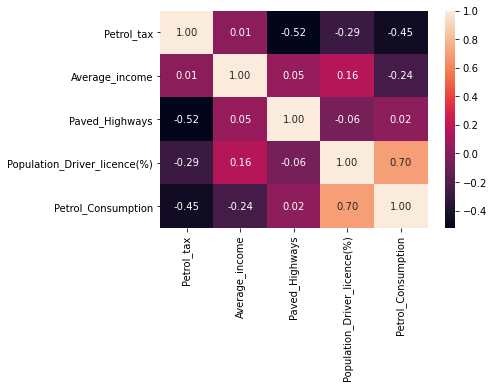

In [14]:
#Identifying the correlation
sns.heatmap(dataset.corr(), annot=True, fmt='.2f')
plt.show()

In [9]:
X = dataset[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]
y = dataset['Petrol_Consumption']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [19]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-26.931910
Average_income,-0.069205
Paved_Highways,-0.001553
Population_Driver_licence(%),1522.437900


In [21]:
y_pred = regressor.predict(X_train)
df = pd.DataFrame({'Actual': y_train, 'Predicted':y_pred})
df

,Actual,Predicted
20,649,708.894161
32,577,660.473608
26,577,589.903414
28,574,560.633509
10,580,496.400266
33,628,610.129241
47,524,570.974795
21,540,573.334076
14,566,642.717991
22,464,410.943757


In [25]:
# Self code - OLS Validation (till next comment)
error_df = pd.DataFrame({'Error': df['Actual'] - df['Predicted'] , 'Pred':df['Predicted']})
error_df

,Error,Pred
20,-59.894161,708.894161
32,-83.473608,660.473608
26,-12.903414,589.903414
28,13.366491,560.633509
10,83.599734,496.400266
33,17.870759,610.129241
47,-46.974795,570.974795
21,-33.334076,573.334076
14,-76.717991,642.717991
22,53.056243,410.943757


In [26]:
error_df.describe()

,Error,Pred
count,3.800000e+01,38.000000
mean,-7.180221e-14,575.578947
std,6.779061e+01,98.668881
min,-1.157142e+02,302.697856
25%,-4.729113e+01,524.997629
50%,-1.262458e+01,565.518824
75%,3.908130e+01,641.427923
max,2.221396e+02,796.230642


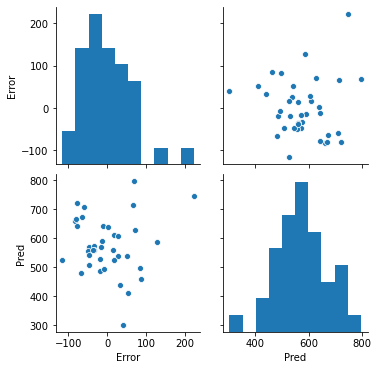

In [27]:
sns.pairplot(error_df)

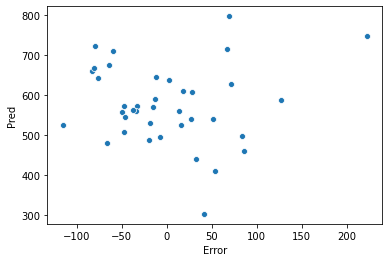

In [28]:
sns.scatterplot(error_df['Error'], error_df['Pred'])

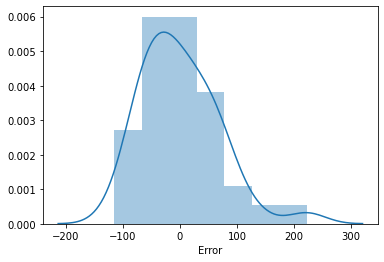

In [29]:
sns.distplot(error_df['Error'])

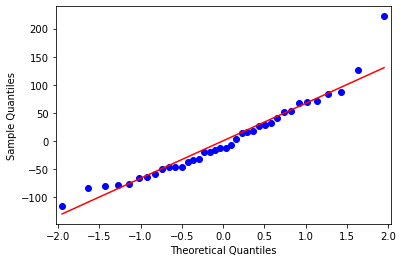

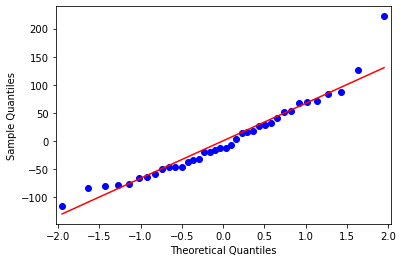

In [50]:
import statsmodels.api as sm 
sm.qqplot(error_df['Error'], line='s')

Text(0, 0.5, 'Residuals')

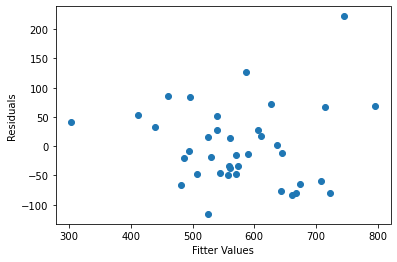

In [35]:
# Validatig the OLS Assumptions
plt.scatter(y_pred, (y_train - y_pred))
plt.xlabel('Fitter Values')
plt.ylabel('Residuals')

In [38]:
(y_train-y_pred).mean()

-7.180221329786275e-14

Text(0.5, 0, 'Residuals')

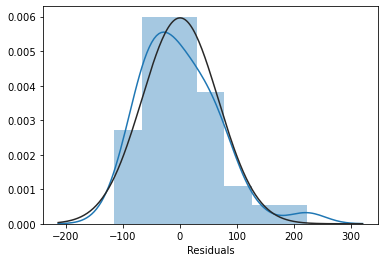

In [47]:
sns.distplot(y_train-y_pred, fit=stats.norm) #fit=norm is not working, stats is imported below
plt.xlabel('Residuals')

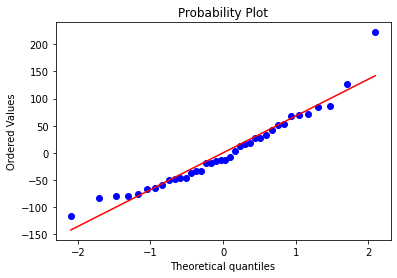

In [45]:
from scipy import stats
stats.probplot(y_train-y_pred, plot=plt)
plt.show()

In [51]:
import statsmodels.api as sm

In [52]:
X_endog = sm.add_constant(X_train)

In [53]:
res = sm.OLS(y_train, X_endog)
res.fit()

In [54]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Petrol_Consumption   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     17.48
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           8.64e-08
Time:                        20:53:55   Log-Likelihood:                -213.64
No. Observations:                  38   AIC:                             437.3
Df Residuals:                      33   BIC:                             445.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          218.0671    256.126      0.851      0.401    -303.026     739.160
Petrol_tax                     -26.9319     17.836     -1.510      0.141     -63.219       9.355
Average_income                  -0.0692      0.021     -3.318      0.002      -0.112      -0.027
Paved_Highways                  -0.0016      0.004     -0.393      0.697      -0.010       0.006
Population_Driver_licence(%)  1522.4379    256.882      5.927      0.000     999.808    2045.068
==============================================================================
Omnibus:                        9.403   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                8.478
Skew:                           0.941   Prob(JB):                       0.0144
Kurtosis:                       4.347   Cond. No.                     2.26e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
# Model evaluation metrics - Regression problems:
y_pred1 = regressor.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))



Mean Absolute Error: 38.74677916228704
Mean Squared Error: 2356.118917263185
Root Mean Squared Error: 48.539869357706195


In [ ]:
# Building the model by removing insignificent variables

In [57]:
X = dataset[['Average_income','Population_Driver_licence(%)']]
y = dataset['Petrol_Consumption']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [68]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [69]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=[['Coefficient']])
coeff_df

,Coefficient
Average_income,-0.071457
Population_Driver_licence(%),1722.285784


In [74]:
y_pred = regressor.predict(X_train)
df = pd.DataFrame({'Actual':y_train, 'Predicted':y_pred})
df

,Actual,Predicted
20,649,716.020522
32,577,678.955840
26,577,599.776221
28,574,572.732134
10,580,501.390879
33,628,604.556546
47,524,566.234497
21,540,583.092757
14,566,639.945149
22,464,432.510075


Text(0, 0.5, 'Residuals')

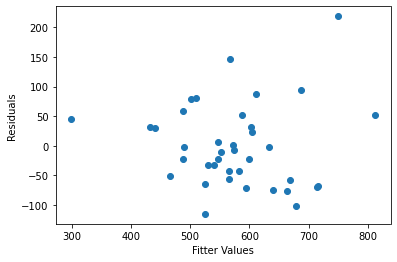

In [76]:
# Validatig the OLS Assumptions
plt.scatter(y_pred, (y_train - y_pred))
plt.xlabel('Fitter Values')
plt.ylabel('Residuals')

In [77]:
(y_train-y_pred).mean()

2.243819165558211e-14

Text(0.5, 0, 'Residuals')

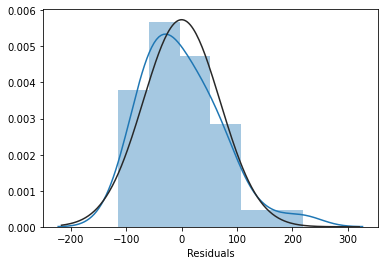

In [78]:
sns.distplot(y_train-y_pred, fit=stats.norm) #fit=norm is not working, stats is imported below
plt.xlabel('Residuals')

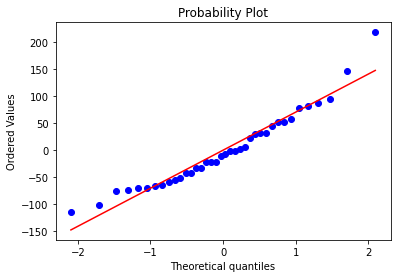

In [79]:
stats.probplot(y_train-y_pred, plot=plt)
plt.show()

In [80]:
X_endog = sm.add_constant(X_train)

In [81]:
res = sm.OLS(y_train, X_endog)
res.fit()

In [83]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Petrol_Consumption   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     33.06
Date:                Sun, 21 Feb 2021   Prob (F-statistic):           8.65e-09
Time:                        17:38:36   Log-Likelihood:                -215.09
No. Observations:                  38   AIC:                             436.2
Df Residuals:                      35   BIC:                             441.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -97.6518    139.270     -0.701      0.488    -380.385     185.081
Average_income                  -0.0715      0.021     -3.438      0.002      -0.114      -0.029
Population_Driver_licence(%)  1722.2858    218.585      7.879      0.000    1278.534    2166.037
==============================================================================
Omnibus:                        7.837   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                6.496
Skew:                           0.898   Prob(JB):                       0.0388
Kurtosis:                       3.935   Cond. No.                     9.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
# Model evaluation metrics - Regression problems:
y_pred1 = regressor.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

Mean Absolute Error: 56.7106016567007
Mean Squared Error: 4815.642283897707
Root Mean Squared Error: 69.39482894205956


In [ ]:
# In my openion it has become a worst model than before. It will be justified with the further learning.

In [ ]:
# Stats Analysis without adding the constant

In [85]:
res = sm.OLS(y_train, X_train)
res.fit()

In [86]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Petrol_Consumption   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              1251.
Date:                Sun, 21 Feb 2021   Prob (F-statistic):                    5.42e-34
Time:                        19:24:31   Log-Likelihood:                         -215.36
No. Observations:                  38   AIC:                                      434.7
Df Residuals:                      36   BIC:                                      438.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Average_income                  -0.0784      0.018     -4.310      0.000      -0.115      -0.041
Population_Driver_licence(%)  1603.7337    137.554     11.659      0.000    1324.761    1882.707
==============================================================================
Omnibus:                       10.668   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.078
Skew:                           1.035   Prob(JB):                      0.00648
Kurtosis:                       4.441   Cond. No.                     5.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
# Model evaluation metrics - Regression problems:
y_pred1 = regressor.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

Mean Absolute Error: 56.7106016567007
Mean Squared Error: 4815.642283897707
Root Mean Squared Error: 69.39482894205956
